### Assignment 3: Decision Tree Classification and Evaluation
### Abhiijith Harikumar
### 2/2/2022

# Task 1

Code Chunk 1 – File Layout; Import the Data and Explore

B. 

In [4]:
#import packages

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.tree import plot_tree

In [5]:
df = pd.read_csv('"C:\Users\abhii\Desktop\Github\Decision Tree Classification and Evaluation\CD_additional_balanced.csv"') #importing and reading data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9280 non-null   int64  
 1   job             9280 non-null   object 
 2   marital         9280 non-null   object 
 3   education       9280 non-null   object 
 4   default         9280 non-null   object 
 5   housing         9280 non-null   object 
 6   loan            9280 non-null   object 
 7   contact         9280 non-null   object 
 8   month           9280 non-null   object 
 9   day_of_week     9280 non-null   object 
 10  duration        9280 non-null   int64  
 11  campaign        9280 non-null   int64  
 12  pdays           9280 non-null   int64  
 13  previous        9280 non-null   int64  
 14  poutcome        9280 non-null   object 
 15  emp.var.rate    9280 non-null   float64
 16  cons.price.idx  9280 non-null   float64
 17  cons.conf.idx   9280 non-null   f

In [7]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,9280.000000,9280,9280,9280,9280,9280,9280,9280,9280,9280,9280.000000,9280.000000,9280.000000,9280.000000,9280,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280
unique,NaN,12,4,8,2,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,yes
freq,NaN,2517,5338,3007,7824,4951,7688,6672,2533,2000,NaN,NaN,NaN,NaN,7244,NaN,NaN,NaN,NaN,NaN,4640
mean,40.403448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,387.361746,2.333297,887.282435,0.315302,NaN,-0.496272,93.479178,-40.218125,2.960209,5135.306487,NaN
std,12.062030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,357.711742,2.334467,313.802415,0.700671,NaN,1.721204,0.634510,5.360642,1.890402,87.105317,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.000000,1.000000,999.000000,0.000000,NaN,-1.800000,92.893000,-42.700000,1.244000,5076.200000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.000000,2.000000,999.000000,0.000000,NaN,-0.100000,93.444000,-41.800000,4.021000,5191.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,528.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.959000,5228.100000,NaN


In [8]:
df.isnull().sum() #checking for nulls

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

The .isnull() function above should not be trusted naively. This is because certain entries may be entered erroneously or may not be the data we need to work with, even though the function does not recognize it as such.

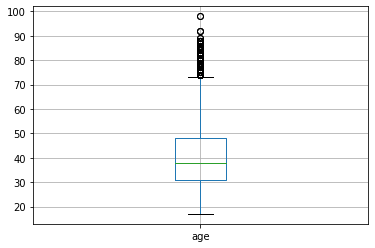

In [9]:
df.boxplot(column='age') #generating boxplot of the distribution of the age variable

This box plot shows us that the average age in this dataset is about 40 years old. The maximum age is 98 whereas the minimum is 17 years old. The first quartile is 31 and the third quartile is just above 48.

# Task 2

Code Chunk 2 - Examination of the Target Variable

In [10]:
df['y'].value_counts() #checking the distribution of the target variable

yes    4640
no     4640
Name: y, dtype: int64

B.

In [11]:
df['y'].value_counts(normalize = True).mul(100).astype(str)+'%'

yes    50.0%
no     50.0%
Name: y, dtype: object

In [12]:
df['y'].describe()

count     9280
unique       2
top        yes
freq      4640
Name: y, dtype: object

The target variable is distributed evenly between "yes" and "no" responses. This is a balanced data set because there are exactly as many "yes" responses as "no" responses in the target variable.

# Task 3

Code Chunk 3 - Data Preparation for Modeling

A.

In [13]:
float_columns_list = list(df.select_dtypes(include='float64').columns)

obj_columns_list = list(df.select_dtypes(include='object').columns)

int_columns_list = list(df.select_dtypes(include='int64').columns)

cat_columns_list = obj_columns_list + int_columns_list #converting object and integer data to categorical

In [14]:
cat_columns_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y',
 'age',
 'duration',
 'campaign',
 'pdays',
 'previous']

In [15]:
del cat_columns_list[-6]

cat_columns_list #removing target variable

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'age',
 'duration',
 'campaign',
 'pdays',
 'previous']

In [16]:
one_hot = pd.get_dummies(df,columns=cat_columns_list) #transforming dataframe to a one-hot encoded dataframe

one_hot.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,...,campaign_29,campaign_30,campaign_31,campaign_32,campaign_34,campaign_39,pdays_0,pdays_1,pdays_2,pdays_3,pdays_4,pdays_5,pdays_6,pdays_7,pdays_8,pdays_9,pdays_10,pdays_11,pdays_12,pdays_13,pdays_14,pdays_15,pdays_16,pdays_17,pdays_18,pdays_19,pdays_20,pdays_21,pdays_22,pdays_25,pdays_26,pdays_27,pdays_999,previous_0,previous_1,previous_2,previous_3,previous_4,previous_5,previous_6
0,1.1,93.994,-36.4,4.857,5191.0,yes,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,1.1,93.994,-36.4,4.857,5191.0,yes,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,1.1,93.994,-36.4,4.857,5191.0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,1.1,93.994,-36.4,4.857,5191.0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,1.1,93.994,-36.4,4.857,5191.0,yes,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [17]:
train_df, test_df = train_test_split(one_hot, test_size=0.3, random_state = 0) #partitioning data set (70% for training and 30% for testing)

train_df.describe(include='all')

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,...,campaign_29,campaign_30,campaign_31,campaign_32,campaign_34,campaign_39,pdays_0,pdays_1,pdays_2,pdays_3,pdays_4,pdays_5,pdays_6,pdays_7,pdays_8,pdays_9,pdays_10,pdays_11,pdays_12,pdays_13,pdays_14,pdays_15,pdays_16,pdays_17,pdays_18,pdays_19,pdays_20,pdays_21,pdays_22,pdays_25,pdays_26,pdays_27,pdays_999,previous_0,previous_1,previous_2,previous_3,previous_4,previous_5,previous_6
count,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,...,6496.000000,6496.000000,6496.000000,6496.0,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.0,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,-0.497675,93.477503,-40.242580,2.955366,5135.364640,NaN,0.270782,0.194119,0.033713,0.021706,0.068504,0.067426,0.033405,0.078972,0.039255,0.157174,0.026786,0.008159,0.111761,0.579741,0.306188,0.002309,0.098522,0.048030,0.129310,0.223214,0.000616,0.129926,0.324200,0.046182,0.838362,0.161638,0.438116,0.023861,0.538023,0.829741,0.023861,0.146398,0.719520,0.280480,...,0.000154,0.000154,0.000154,0.0,0.000154,0.000154,0.001385,0.001078,0.004002,0.034637,0.008467,0.003849,0.034791,0.004156,0.001232,0.003387,0.003233,0.002001,0.003233,0.002771,0.001232,0.001693,0.000462,0.000462,0.000308,0.000154,0.000154,0.000308,0.000154,0.000154,0.000154,0.0,0.886546,0.779249,0.156404,0.042642,0.015086,0.004464,0.001847,0.000308
std,1.723507,0.635382,5.374951,1.891475,87.007012,NaN,0.444398,0.395552,0.180503,0.145732,0.252628,0.250778,0.179706,0.269715,0.194216,0.363992,0.161469,0.089964,0.315097,0.493638,0.460944,0.048001,0.298042,0.213845,0.335569,0.416433,0.024809,0.336248,0.468111,0.209896,0.368147,0.368147,0.496194,0.152627,0.498591,0.375889,0.152627,0.353532,0.4

In [18]:
train_df['y'].value_counts(normalize = True).mul(100).astype(str)+'%' #checking the distribution of the target variable in training dataset

no     50.01539408866995%
yes    49.98460591133005%
Name: y, dtype: object

In [19]:
test_df['y'].value_counts(normalize = True).mul(100).astype(str)+'%' #checking the distribution of the target variable in testing dataset

yes     50.03591954022989%
no     49.964080459770116%
Name: y, dtype: object

# Task 4

Code Chunk 4 – Train and Test Decision Tree 1 to Classify and Evaluate

In [20]:
independent_variable_list = list(set(list(train_df.columns)+list(test_df.columns))) #setting all training variables as independent

independent_variable_list

['duration_1767',
 'duration_1265',
 'duration_1447',
 'duration_1817',
 'duration_1022',
 'duration_809',
 'age_61',
 'duration_131',
 'duration_348',
 'duration_501',
 'duration_551',
 'duration_258',
 'duration_387',
 'age_42',
 'duration_98',
 'duration_858',
 'duration_1148',
 'age_79',
 'duration_636',
 'duration_610',
 'duration_437',
 'duration_1020',
 'duration_565',
 'duration_749',
 'duration_877',
 'duration_1093',
 'duration_762',
 'duration_419',
 'duration_633',
 'job_unemployed',
 'duration_2621',
 'duration_1624',
 'duration_1003',
 'duration_857',
 'duration_912',
 'duration_366',
 'duration_654',
 'duration_1311',
 'job_entrepreneur',
 'duration_713',
 'poutcome_failure',
 'duration_510',
 'duration_747',
 'duration_1488',
 'duration_627',
 'duration_16',
 'duration_363',
 'pdays_5',
 'duration_260',
 'duration_426',
 'duration_1149',
 'duration_329',
 'campaign_3',
 'duration_1044',
 'duration_82',
 'duration_735',
 'duration_718',
 'duration_1161',
 'duration_420',

In [21]:
independent_variable_list.remove('y') #removing target variable from independent variable list

In [22]:
dependent_variable_list = ['y'] #defining target variable as the dependent variable

In [23]:
X_train = train_df[independent_variable_list].to_numpy() #Split the Training Data Set into Independent (X) and Dependent (y) Variable Data, as NumPy Array Data Structures

y_train = train_df[dependent_variable_list].to_numpy()

In [24]:
X_test = test_df[independent_variable_list].to_numpy() #Split the Testing Data Set into Independent (X) and Dependent (y) Variable Data, as NumPy Array Data Structures

y_test = test_df[dependent_variable_list].to_numpy()

A.

In [25]:
decision_tree_1 = DecisionTreeClassifier(random_state = 0)

decision_tree_1 = decision_tree_1.fit(X_train,y_train) #fitting decision tree classifier to training data

In [26]:
decision_tree_1_model = export_text(decision_tree_1)
print(decision_tree_1_model) #printing model's results

|--- feature_734 <= 5087.65
|   |--- feature_1098 <= 0.50
|   |   |--- feature_1332 <= 0.50
|   |   |   |--- feature_670 <= 0.50
|   |   |   |   |--- feature_612 <= 0.50
|   |   |   |   |   |--- feature_502 <= 0.50
|   |   |   |   |   |   |--- feature_1028 <= 0.50
|   |   |   |   |   |   |   |--- feature_713 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_1516 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_1064 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_58 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 28
|   |   |   |   |   |   |   |   |   |   |--- feature_58 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |   |   |   |--- feature_1064 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |   |   |--- feature_1516 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |   |--- feature_713 >  0.50
|   |   |   |   | 

B.

In [27]:
predictions_1 = decision_tree_1.predict(X_test) #making predictions on test set with the fitted model

predictions_1

array(['no', 'yes', 'yes', ..., 'yes', 'yes', 'no'], dtype=object)

C.

In [28]:
predictions_probabilities_1 = decision_tree_1.predict_proba(X_test) #predicting the target class probabilities of the testing set dependent variable

predictions_probabilities_1

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

D.

In [29]:
predictions_probabilities_0_class = predictions_probabilities_1[:,0] #Creating a pandas dataframe that shows the predicted target class of the testing set, the predicted probabilities of the various classes of the testing set, and the ground truth class of the testing set.

predictions_probabilities_1_class = predictions_probabilities_1[:,1]

predictions_summary_df = pd.DataFrame(data={'Predicted_Class':predictions_1,
                                            'Predicted_Probabilities_0_Class':predictions_probabilities_0_class,
                                            'Predicted_Probabilities_1_Class':predictions_probabilities_1_class,
                                            'Ground_Truth':y_test.reshape(-1)})

E.

In [52]:
confusion_matrix (y_test,predictions_1, labels = ['no', 'yes']) #generating confusion matrix

array([[1050,  341],
       [ 494,  899]])

In [31]:
print(classification_report(y_test,predictions_1))

              precision    recall  f1-score   support

          no       0.68      0.75      0.72      1391
         yes       0.72      0.65      0.68      1393

    accuracy                           0.70      2784
   macro avg       0.70      0.70      0.70      2784
weighted avg       0.70      0.70      0.70      2784



The confusion matrix shows us that we correctly predicted 1,056 negative results and 913 positive results. However, we incorrectly predicted 335 negative results as positive and 480 positive results as negative.

This matches up with what we are seeing in the classification report. For example, out of 1,391 negative cases, we correctly predicted 76% of them. This is reflected in our "no" recall score of 0.76. Out of 1,393 positive cases, we correctly predicted 66% of them. Again, this is reflected in our classification report in our "yes" recall score of 0.66.

# Task 5

Code Chunk 5 – Train and Test Decision Tree 2 to Classify and Evaluate

A.

In [32]:
#Fit a simplified version of Decision Tree 1 by adjusting the ccp_alpha parameter of Decision Tree 1.

decision_tree_2 = DecisionTreeClassifier(random_state=0,ccp_alpha=0.01)

decision_tree_2 = decision_tree_2.fit(X_train,y_train)

In [33]:
decision_tree_2_model = export_text(decision_tree_2) #outputting model's results
print(decision_tree_2_model)

|--- feature_734 <= 5087.65
|   |--- class: yes
|--- feature_734 >  5087.65
|   |--- feature_450 <= -46.65
|   |   |--- class: yes
|   |--- feature_450 >  -46.65
|   |   |--- class: no



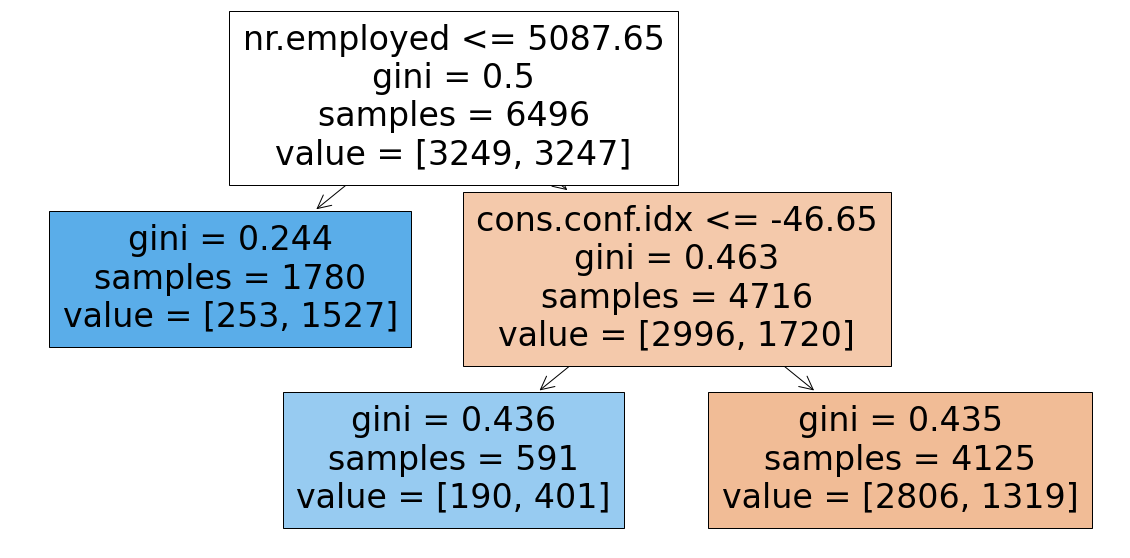

In [34]:
fig = plt.figure(figsize=(20,10))
ax = plot_tree(decision_tree_2,feature_names=independent_variable_list,filled=True)

B.

In [35]:
predictions_2_train = decision_tree_2.predict(X_train) #predicting dependent variables of training data set

predictions_2_train

array(['no', 'no', 'no', ..., 'no', 'yes', 'yes'], dtype=object)

C.

In [36]:
predictions_2_test = decision_tree_2.predict(X_test) #predicting dependent variables of testing data set

predictions_2_test

array(['no', 'no', 'yes', ..., 'no', 'yes', 'yes'], dtype=object)

D.

In [37]:
print(confusion_matrix(y_train,predictions_2_train)) #generating confusion matrix and classification report for training data set

print(classification_report(y_train,predictions_2_train))

[[2806  443]
 [1319 1928]]
              precision    recall  f1-score   support

          no       0.68      0.86      0.76      3249
         yes       0.81      0.59      0.69      3247

    accuracy                           0.73      6496
   macro avg       0.75      0.73      0.72      6496
weighted avg       0.75      0.73      0.72      6496



In [38]:
print(confusion_matrix(y_test,predictions_2_test)) #generating confusion matrix and classification report for testing data set

print(classification_report(y_test,predictions_2_test))

[[1214  177]
 [ 544  849]]
              precision    recall  f1-score   support

          no       0.69      0.87      0.77      1391
         yes       0.83      0.61      0.70      1393

    accuracy                           0.74      2784
   macro avg       0.76      0.74      0.74      2784
weighted avg       0.76      0.74      0.74      2784



E.

The training model had significantly more accurate data. This is indicated by the higher level of true positives and negatives in the training confusion matrix than in the testing confusion matrix. Additionally, the training matrix had slightly higher precision, recall, and f1-scores. If the confusion matrix for the training set had zeros for all of its off-diagonal elements, then that means that we created an extremely accurate algorithm that fits the training set perfectly.

# Task 6

Code chunk 6 – Train and Test Decision Tree 3 to Classify and Evaluate

A.

In [39]:
# removing 'duration' variable from training and testing set predictors
filtered_independent_variable_list = [x for x in independent_variable_list if "duration" not in x]

In [40]:
X_filtered_train = train_df[filtered_independent_variable_list].to_numpy()

X_filtered_test = test_df[filtered_independent_variable_list].to_numpy()
# converting training and testing data to numpy

B.

In [41]:
decision_tree_3 = DecisionTreeClassifier(random_state=0)

decision_tree_3 = decision_tree_3.fit(X_filtered_train,y_train)

decision_tree_3_model = export_text(decision_tree_3)
print(decision_tree_3_model)

|--- feature_91 <= 5087.65
|   |--- feature_141 <= 0.50
|   |   |--- feature_170 <= 0.50
|   |   |   |--- feature_177 <= 0.50
|   |   |   |   |--- feature_130 <= 0.50
|   |   |   |   |   |--- feature_188 <= 0.50
|   |   |   |   |   |   |--- feature_112 <= 0.50
|   |   |   |   |   |   |   |--- feature_93 <= 1.26
|   |   |   |   |   |   |   |   |--- feature_175 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_171 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_152 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |   |--- feature_152 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_171 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_63 <= 94.40
|   |   |   |   |   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |   |   |   |   |--- feature_63 >  94.40
|   |   |   |   |   |   |   |   |

C.

In [42]:
# making predictions on the filtered test set with the fitted model
predictions_3 = decision_tree_3.predict(X_filtered_test)

predictions_3

array(['no', 'yes', 'yes', ..., 'yes', 'yes', 'no'], dtype=object)

D.

In [43]:
# Showing the Trained Model's Prediction Probabilities for the Various Target Classes
predictions_probabilities_3 = decision_tree_3.predict_proba(X_filtered_test)
print(predictions_probabilities_3)
print("\n")
print("Shape of Prediction Probability Array: "+str(predictions_probabilities_3.shape))

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


Shape of Prediction Probability Array: (2784, 2)


E.

In [44]:
# Making a Dataframe that Includes the Predictions, Prediction Probabilities, and Ground Truth

predictions_probabilities_0_class = predictions_probabilities_3[:,0]
print(predictions_probabilities_0_class.shape)
predictions_probabilities_1_class = predictions_probabilities_3[:,1]
print(predictions_probabilities_1_class.shape)
predictions_summary_df = pd.DataFrame(data={'Predicted_Class':predictions_3,
                                            'Predicted_Probabilities_0_Class':predictions_probabilities_0_class,
                                            'Predicted_Probabilities_1_Class':predictions_probabilities_1_class,
                                            'Ground_Truth':y_test.reshape(-1)})
print("\n")
predictions_summary_df

(2784,)
(2784,)




,Predicted_Class,Predicted_Probabilities_0_Class,Predicted_Probabilities_1_Class,Ground_Truth
0,no,1.0,0.0,no
1,yes,0.0,1.0,no
2,yes,0.0,1.0,yes
3,no,1.0,0.0,no
4,no,1.0,0.0,yes
...,...,...,...,...
2779,no,1.0,0.0,no
2780,yes,0.0,1.0,no
2781,yes,0.0,1.0,no
2782,yes,0.0,1.0,no


F.

In [53]:
print(confusion_matrix(y_test,predictions_3)) #generating confusion matrix and classification report

print(classification_report(y_test,predictions_3))

[[914 477]
 [491 902]]
              precision    recall  f1-score   support

          no       0.65      0.66      0.65      1391
         yes       0.65      0.65      0.65      1393

    accuracy                           0.65      2784
   macro avg       0.65      0.65      0.65      2784
weighted avg       0.65      0.65      0.65      2784



The confusion matrix shows us that we correctly predicted 914 negative results and 902 positive results. However, we incorrectly predicted 477 negative results as positive and 491 positive results as negative.

This matches up with what we are seeing in the classification report. For example, out of 1,391 negative cases, we correctly predicted 66% of them. This is reflected in our "no" recall score of 0.66. Out of 1,393 positive cases, we correctly predicted 65% of them. Again, this is reflected in our classification report in our "yes" recall score of 0.65.

 # Task 7

Code chunk 7 – Training and Testing Decision Tree 4 to Classify and Evaluate

A.

In [45]:
# adjusting the max_leaf_nodes parameter of Decision Tree 3
decision_tree_4 = DecisionTreeClassifier(random_state=0 ,max_leaf_nodes=10)

decision_tree_4 = decision_tree_4.fit(X_filtered_train,y_train)

decision_tree_4_model = export_text(decision_tree_4)
print(decision_tree_4_model)

|--- feature_91 <= 5087.65
|   |--- feature_141 <= 0.50
|   |   |--- class: yes
|   |--- feature_141 >  0.50
|   |   |--- class: yes
|--- feature_91 >  5087.65
|   |--- feature_58 <= -46.65
|   |   |--- feature_93 <= 1.39
|   |   |   |--- class: yes
|   |   |--- feature_93 >  1.39
|   |   |   |--- feature_93 <= 1.53
|   |   |   |   |--- class: yes
|   |   |   |--- feature_93 >  1.53
|   |   |   |   |--- class: yes
|   |--- feature_58 >  -46.65
|   |   |--- feature_63 <= 93.96
|   |   |   |--- feature_141 <= 0.50
|   |   |   |   |--- class: yes
|   |   |   |--- feature_141 >  0.50
|   |   |   |   |--- feature_105 <= 0.50
|   |   |   |   |   |--- feature_93 <= 1.28
|   |   |   |   |   |   |--- class: no
|   |   |   |   |   |--- feature_93 >  1.28
|   |   |   |   |   |   |--- class: no
|   |   |   |   |--- feature_105 >  0.50
|   |   |   |   |   |--- class: yes
|   |   |--- feature_63 >  93.96
|   |   |   |--- class: no



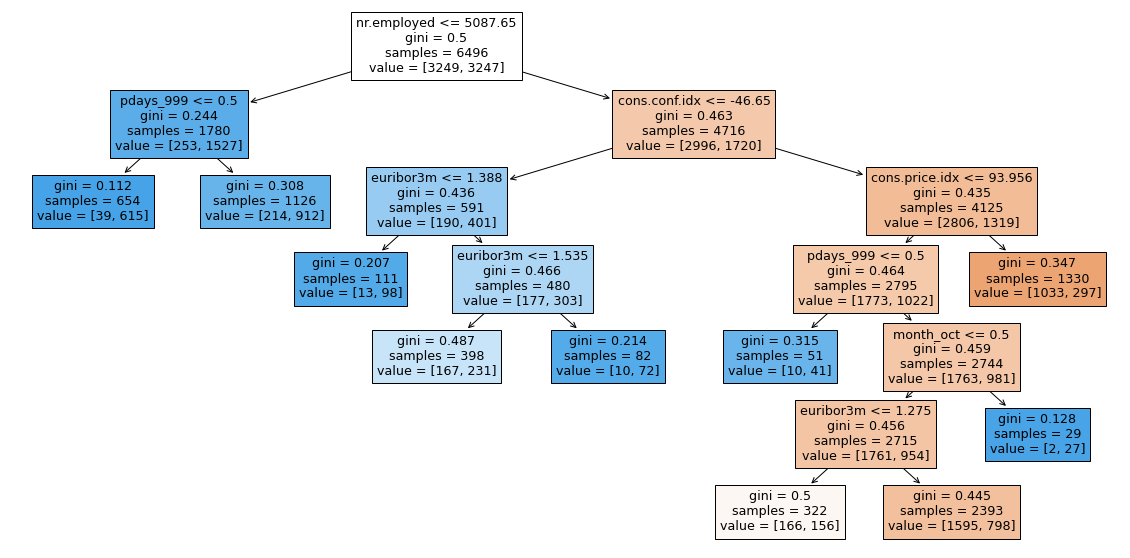

In [46]:
fig = plt.figure(figsize=(20,10))
ax = plot_tree(decision_tree_4,feature_names=filtered_independent_variable_list,filled=True)

B.

In [47]:
#making prediction on training data set
predictions_4_train = decision_tree_4.predict(X_filtered_train)

C.

In [48]:
#making prediction on testing data set
predictions_4_test = decision_tree_4.predict(X_filtered_test)

D.

In [49]:
# generating confusion matrix and classification report on training data
print(confusion_matrix(y_train,predictions_4_train))
print(classification_report(y_train,predictions_4_train))

[[2794  455]
 [1251 1996]]
              precision    recall  f1-score   support

          no       0.69      0.86      0.77      3249
         yes       0.81      0.61      0.70      3247

    accuracy                           0.74      6496
   macro avg       0.75      0.74      0.73      6496
weighted avg       0.75      0.74      0.73      6496



In [50]:
# generating confusion matrix and classification report on testing data
print(confusion_matrix(y_test,predictions_4_test))
print(classification_report(y_test,predictions_4_test))

[[1211  180]
 [ 514  879]]
              precision    recall  f1-score   support

          no       0.70      0.87      0.78      1391
         yes       0.83      0.63      0.72      1393

    accuracy                           0.75      2784
   macro avg       0.77      0.75      0.75      2784
weighted avg       0.77      0.75      0.75      2784



E.

Two parameters within the DecisionTreeClassifier that would simplify the models are max_depth and max_features

In [54]:
%%shell
 jupyter nbconvert --to html /Assignment3_Harikumar_Abhiijith.ipynb

[NbConvertApp] WARNING | pattern u'/Assignment3_Harikumar_Abhiijith.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*

CalledProcessError: ignored